In [27]:
import pandas as pd
df=pd.read_csv("C:/Users/bhava/OneDrive/Desktop/wine_quality_proj/data/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

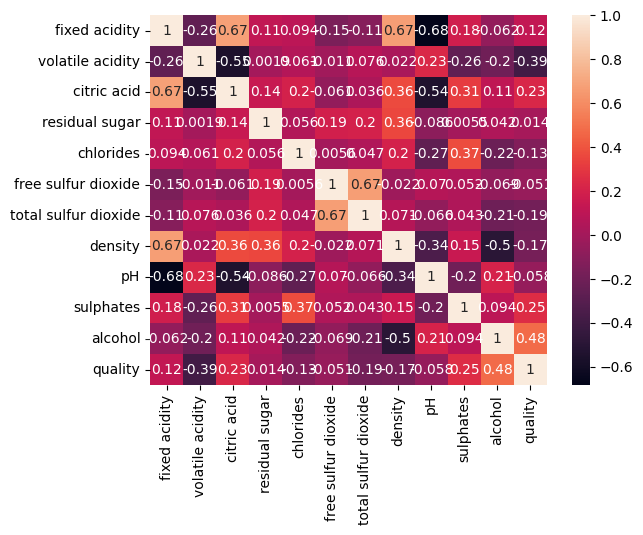

In [30]:
import seaborn as seaborn
seaborn.heatmap(df.corr(), annot=True)

In [31]:
correlations = df.corr(numeric_only=True)['quality'].sort_values(ascending=False)
correlations

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [32]:
# Top 3 features most positively correlated with quality 
top_features = correlations.drop('quality').head(3).index.tolist()
top_features

['alcohol', 'sulphates', 'citric acid']

Text(0.5, 0, 'Quality')

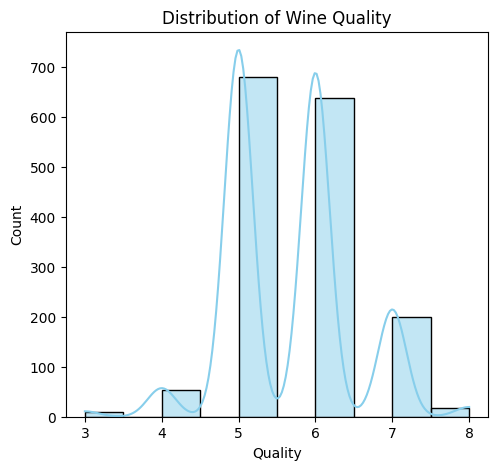

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
seaborn.histplot(df['quality'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')


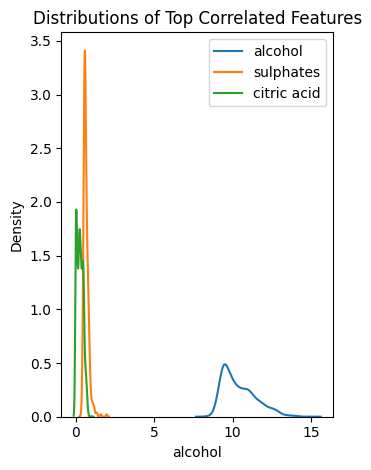

In [34]:
plt.subplot(1, 2, 2)
for feature in top_features:
    seaborn.kdeplot(df[feature], label=feature)
plt.title('Distributions of Top Correlated Features')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
sum_cal=df.isna().sum()
sum_cal

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum()
print(outlier_counts)

fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                  28
dtype: int64


In [37]:
def cap_outliers(col):
    lower = col.quantile(0.01)
    upper = col.quantile(0.99)
    return col.clip(lower, upper)

df_capped = df.apply(cap_outliers)

In [38]:
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1179 non-null   float64
 1   volatile acidity      1179 non-null   float64
 2   citric acid           1179 non-null   float64
 3   residual sugar        1179 non-null   float64
 4   chlorides             1179 non-null   float64
 5   free sulfur dioxide   1179 non-null   float64
 6   total sulfur dioxide  1179 non-null   float64
 7   density               1179 non-null   float64
 8   pH                    1179 non-null   float64
 9   sulphates             1179 non-null   float64
 10  alcohol               1179 non-null   float64
 11  quality               1179 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 119.7 KB


In [40]:
df_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,8.162002,0.523066,0.246760,2.185411,0.078586,15.020356,42.268024,0.996584,3.324623,0.631264,10.350792,5.623410
std,1.458270,0.164231,0.179441,0.440972,0.014317,8.792916,26.106438,0.001593,0.131731,0.116098,0.963954,0.721248
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995520,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.500000,0.087000,20.000000,56.000000,0.997600,3.410000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,42.000000,122.000000,1.001000,3.680000,0.980000,13.400000,7.000000


In [41]:
from sklearn.preprocessing import StandardScaler

# Select features to scale
features = ['alcohol', 'sulphates', 'citric acid']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

print(df_scaled[features].describe())

            alcohol     sulphates   citric acid
count  1.599000e+03  1.599000e+03  1.599000e+03
mean   1.066481e-16  6.754377e-16 -8.887339e-17
std    1.000313e+00  1.000313e+00  1.000313e+00
min   -1.898919e+00 -1.936507e+00 -1.391472e+00
25%   -8.663789e-01 -6.382196e-01 -9.293181e-01
50%   -2.093081e-01 -2.251281e-01 -5.636026e-02
75%    6.354971e-01  4.240158e-01  7.652471e-01
max    4.202453e+00  7.918677e+00  3.743574e+00


In [42]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop('quality', axis=1)
y = df_scaled.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
preds = lr.predict(X_test)

In [44]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score
print("RMSE:", root_mean_squared_error(y_test, preds))
print("R²:", r2_score(y_test, preds))

RMSE: 0.6245199307980135
R²: 0.4031803412796209


In [45]:
# Train the Random Forest for better results
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
# Predictions
y_pred = rf.predict(X_test)

In [47]:
# Evaluation
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

RMSE: 0.549
R² Score: 0.539


In [48]:
# To improve accuracy trying different models
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluation
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost RMSE: {rmse:.3f}")
print(f"XGBoost R² Score: {r2:.3f}")

XGBoost RMSE: 0.573
XGBoost R² Score: 0.498


In [49]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
}

model = xgb.XGBRegressor(random_state=42)
grid = GridSearchCV(model, param_grid=params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best RMSE:", -grid.best_score_)
print("Best Params:", grid.best_params_)

Best RMSE: 0.6056834816932678
Best Params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}


In [50]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred = best_rf.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Tuned RMSE: {rmse:.3f}")
print(f"Tuned R²: {r2:.3f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Tuned RMSE: 0.541
Tuned R²: 0.552


In [52]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.005,
    depth=7,
    eval_metric='RMSE',
    verbose=100,
    random_state=42
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"CatBoost RMSE: {rmse:.4f}")
print(f"R²: {r2:.3f}")

0:	learn: 0.8051921	test: 0.8094880	best: 0.8094880 (0)	total: 4.72ms	remaining: 23.6s
100:	learn: 0.7077634	test: 0.7191344	best: 0.7191344 (100)	total: 167ms	remaining: 8.12s
200:	learn: 0.6501227	test: 0.6694040	best: 0.6694040 (200)	total: 307ms	remaining: 7.34s
300:	learn: 0.6147312	test: 0.6412675	best: 0.6412675 (300)	total: 461ms	remaining: 7.19s
400:	learn: 0.5902956	test: 0.6234886	best: 0.6234886 (400)	total: 611ms	remaining: 7.01s
500:	learn: 0.5725040	test: 0.6126418	best: 0.6126418 (500)	total: 760ms	remaining: 6.82s
600:	learn: 0.5587149	test: 0.6049644	best: 0.6049644 (600)	total: 905ms	remaining: 6.62s
700:	learn: 0.5474895	test: 0.5992834	best: 0.5992834 (700)	total: 1.04s	remaining: 6.41s
800:	learn: 0.5374295	test: 0.5951967	best: 0.5951967 (800)	total: 1.19s	remaining: 6.23s
900:	learn: 0.5291379	test: 0.5915910	best: 0.5915910 (900)	total: 1.33s	remaining: 6.06s
1000:	learn: 0.5215353	test: 0.5881411	best: 0.5881411 (1000)	total: 1.49s	remaining: 5.93s
1100:	learn

In [53]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
# Models
rf = RandomForestRegressor(n_estimators=300, random_state=42)
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
cat = CatBoostRegressor(iterations=300, learning_rate=0.1, depth=6, verbose=0, random_state=42)
ridge = Ridge(alpha=1.0)

# Train
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
cat.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Predict
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
cat_pred = cat.predict(X_test)
ridge_pred = ridge.predict(X_test)

# Blend predictions (equal weights)
blended_pred = (rf_pred + xgb_pred + cat_pred + ridge_pred) / 4

# Evaluate
rmse = root_mean_squared_error(y_test, blended_pred)
print(f"Blended Model RMSE: {rmse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"Blended Model R²: {r2:.3f}")

Blended Model RMSE: 0.5547
Blended Model R²: 0.534


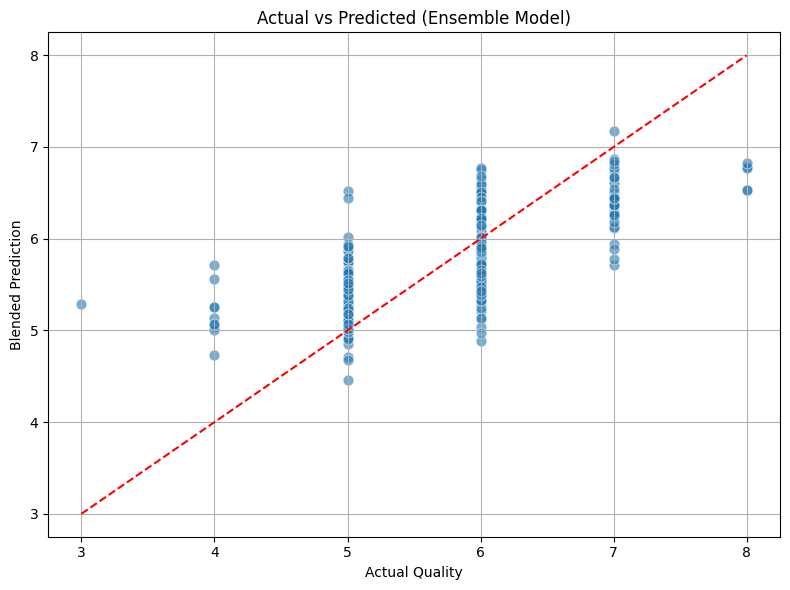

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=blended_pred, alpha=0.6, s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Perfect line
plt.xlabel('Actual Quality')
plt.ylabel('Blended Prediction')
plt.title('Actual vs Predicted (Ensemble Model)')
plt.grid(True)
plt.tight_layout()
plt.show()

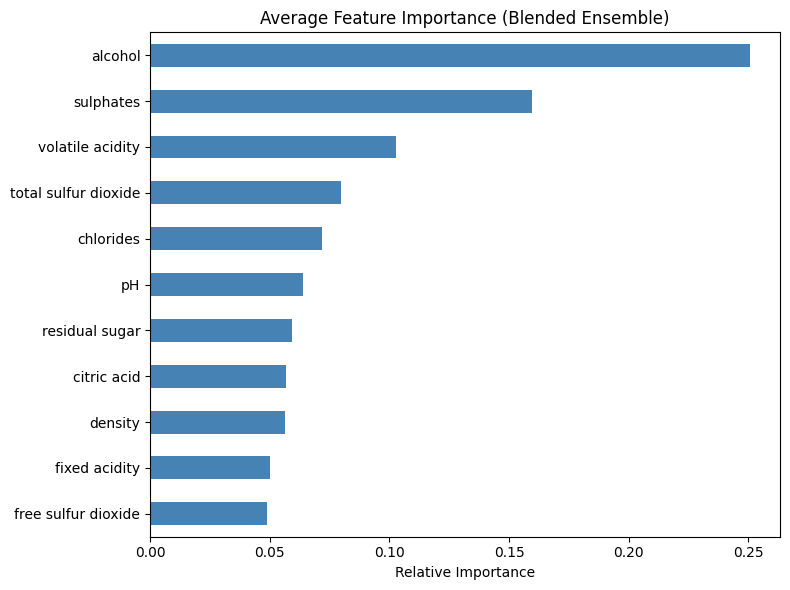

In [55]:
# Get feature importances from each model
rf_imp = pd.Series(rf.feature_importances_, index=X.columns)
xgb_imp = pd.Series(xgb.feature_importances_, index=X.columns)
cat_imp = pd.Series(cat.get_feature_importance(), index=X.columns)

# Normalize each to sum to 1
rf_imp /= rf_imp.sum()
xgb_imp /= xgb_imp.sum()
cat_imp /= cat_imp.sum()

# Average them (or use custom weights if blending is weighted)
combined_importance = (rf_imp + xgb_imp + cat_imp) / 3

# Sort and plot
combined_importance.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6), color='steelblue')
plt.title('Average Feature Importance (Blended Ensemble)')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the models (individually or create an ensemble class)
joblib.dump(rf, 'C:/Users/bhava/OneDrive/Desktop/wine_quality_proj/models/rf_model.pkl')
joblib.dump(xgb, 'C:/Users/bhava/OneDrive/Desktop/wine_quality_proj/models/xgb_model.pkl')
joblib.dump(cat, 'C:/Users/bhava/OneDrive/Desktop/wine_quality_proj/models/cat_model.pkl')
joblib.dump(ridge, 'C:/Users/bhava/OneDrive/Desktop/wine_quality_proj/models/ridge_model.pkl')

['C:/Users/bhava/OneDrive/Desktop/wine_quality_proj/models/ridge_model.pkl']